<a href="https://colab.research.google.com/github/Brokencarer/Electrophoretic-force/blob/main/Electrophoretic_Force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#kdefine basic parameters
h_water = 520 #height of rotation center to water
x_1 = -2663
x_2 = -2643
y_1 = 1695
y_2 = 1365
w = 7.8*3.14156/180
v = 6.91*1000/60

In [ ]:
T = 360/7.8
T

46.15384615384615

In [ ]:
def rotate(old_position):
  odx, ody = old_position[0],old_position[1]
  nx = odx*math.cos(theta_t)-ody*math.sin(theta_t)
  ny = odx*math.sin(theta_t)+ody*math.cos(theta_t)
  new_position = [nx, ny]
  return new_position

def transpose(old_position):
  nx, ny = old_position[0] - length ,old_position[1]
  new_position = [nx, ny]
  return new_position

def find_new(old_position):
  return transpose(rotate(old_position))




In [ ]:
thetaA = 3.14159-math.atan(-y_1/x_1)
thetaB = 3.14159-math.atan(-y_2/x_2)
RA = math.sqrt(x_1**2+y_1**2)
RB = math.sqrt(x_2**2+y_2**2)
velocity = []
pa = []
pb = []
force = []
for t in range(46):
  theta_t, length = t*w , v*t
  v_A = [w*RA*math.cos(thetaA+3.1415/2+theta_t) - v ,w*RA*math.sin(thetaA+3.1415/2+theta_t) ]
  v_B = [w*RB*math.cos(thetaB+3.1415/2+theta_t) - v ,w*RB*math.sin(thetaB+3.1415/2+theta_t) ]
  p_A = transpose(rotate([x_1, y_1]))
  p_B = transpose(rotate([x_2, y_2]))
  pose = np.array(p_B) - np.array(p_A)

  vel= (np.array(v_A)+np.array(v_B))/2
  angle_bet = math.acos(np.dot(vel,pose)/(np.linalg.norm(vel) * np.linalg.norm(pose)))
  f_dmls = (np.linalg.norm(vel)*math.sin(angle_bet))**2*(np.linalg.norm(pose))
  velocity.append(vel)
  pa.append(np.array(p_A))
  pb.append(np.array(p_B))
  force.append(f_dmls)



In [ ]:
pa

[array([-2663.,  1695.]),
 array([-2983.56419629,  1317.91107896]),
 array([-3251.05175118,   916.43561699]),
 array([-3462.64412885,   498.00248995]),
 array([-3616.55707421,    70.35435721]),
 array([-3712.07362865,  -358.59560798]),
 array([-3749.55739655,  -780.91014335]),
 array([-3730.44581724, -1188.77476821]),
 array([-3657.22356664, -1574.64238203]),
 array([-3533.37658103, -1931.37291559]),
 array([-3363.3275535 , -2252.36545029]),
 array([-3152.3540967 , -2531.68036112]),
 array([-2906.49108628, -2764.14922315]),
 array([-2632.41899192, -2945.47044766]),
 array([-2337.34026233, -3072.28887849]),
 array([-2028.84605166, -3142.25787566]),
 array([-1714.77575324, -3154.08273738]),
 array([-1403.07193998, -3107.54465719]),
 array([-1101.63339546, -3003.50477269]),
 array([ -818.16895545, -2843.88823115]),
 array([ -560.05486402, -2631.64856666]),
 array([ -334.19828404, -2370.71304819]),
 array([ -146.90948752, -2065.9100096 ]),
 array([   -3.78509066, -1722.87950651]),
 array([

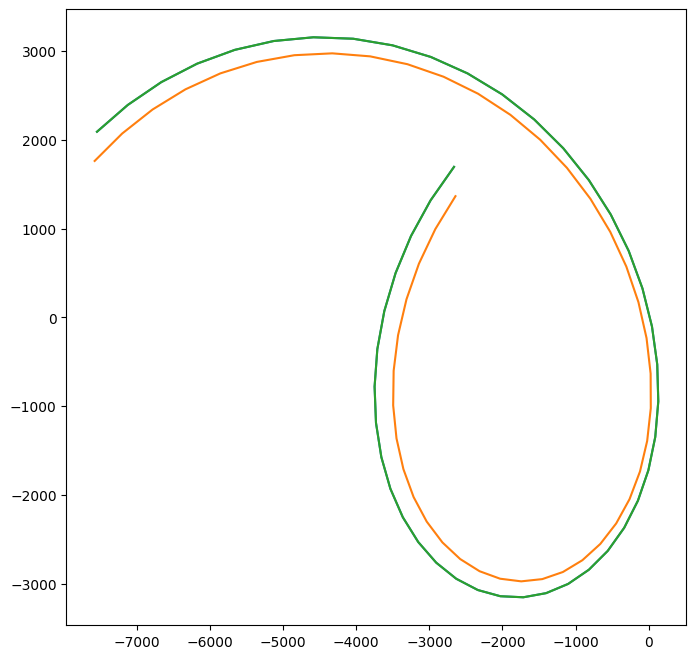

In [ ]:
plt.figure(figsize=(8,8))
plt.plot([i[0] for i in pa], [i[1] for i in pa])
plt.plot([i[0] for i in pb], [i[1] for i in pb])
plt.plot([i[0] for i in pa], [i[1] for i in pa])


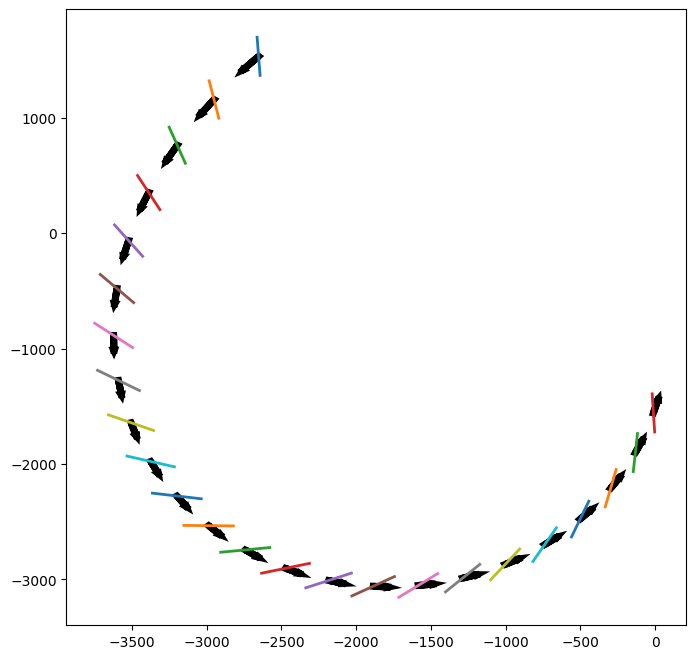

In [ ]:

plt.figure(figsize=(8,8))
for i in range(24):
  plt.plot([pa[i][0],pb[i][0]], [pa[i][1],pb[i][1]], lw =2)
  plt.arrow((pa[i][0]+pb[i][0])/2, (pa[i][1]+pb[i][1])/2, velocity[i][0]/3,velocity[i][1]/3, # 坐标与距离
    head_width=3, lw=5,#箭头⻓度，箭尾线宽,
    length_includes_head = True,
    fc='k',ec='k') # ⻓度计算包含箭头箭尾


In [ ]:
velocity

[array([-323.46978438, -361.15400713]),
 array([-272.52885419, -386.08230684]),
 array([-218.67610432, -403.86656464]),
 array([-162.90802254, -414.17770179]),
 array([-106.25653781, -416.82492166]),
 array([ -49.76992553, -411.75924029]),
 array([   5.5065897 , -399.07439271]),
 array([  58.55017485, -379.0050985 ]),
 array([ 108.37931485, -351.9227186 ]),
 array([ 154.07197454, -318.32838359]),
 array([ 194.78265992, -278.84372086]),
 array([ 229.75806311, -234.19935205]),
 array([ 258.35100153, -185.22137366]),
 array([ 280.0323933 , -132.81607101]),
 array([294.40104735, -77.95314842]),
 array([301.19108706, -21.64778584]),
 array([300.27686995,  35.05814597]),
 array([291.67531266,  91.11536412]),
 array([275.54557782, 145.48658949]),
 array([252.18612902, 197.16574048]),
 array([222.02920797, 245.19654942]),
 array([185.63283638, 288.69025735]),
 array([143.67049033, 326.84205952]),
 array([ 96.91863837, 358.94599748]),
 array([ 46.2423737 , 384.40802203]),
 array([ -7.42059335, 

In [ ]:
7.8*6.5

50.699999999999996

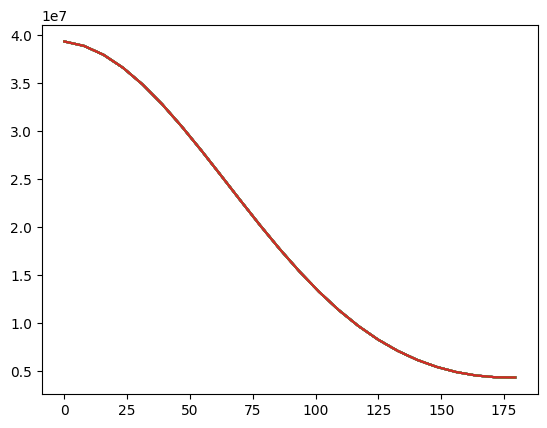

In [ ]:
for i in range(24):
  plt.plot([i*w*180/3.1415 for i in range(24)],[force[i] for i in range(24)])


In [ ]:
math.atan(-y_1/x_1)

0.3217505543966422

In [ ]:
R1 = math.sqrt(y_1**2+x_1**2)
R2 = math.sqrt(y_2**2+x_2**2)


In [ ]:
w*(R1-R2)

24.77676778035139

In [ ]:
math.sqrt(50**2+411**2)

414.03019213579097